* TELECOM CHURN DATA ANALYSIS 
 * DESCRIPTIVE STATISITCS 
 * DATA CLEANING
 * Exploratory Data analysis-EDA
 * VISUALISATION
 * MODEL BUILDING
 * RESULT ANALYSIS

**Importing necesssary libraries**

In [171]:
import numpy as np 
# linear algebra
import pandas as pd
# data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
# for data visualization
import seaborn as sns 
# for data visualization
import warnings
warnings.filterwarnings('ignore')

In [172]:
df=pd.read_csv('C:/Users/yash mehra/Downloads/telecom churn.csv')

**Data Collection**

In [173]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25.0,110.0,45.07,99.0,16.78,91.0,11.01,3.0,2.70,1.0,False
1,OH,107,415,371-7191,no,yes,26.0,123.0,27.47,103.0,16.62,103.0,11.45,3.0,3.70,1.0,False
2,NJ,137,415,358-1921,no,no,0.0,114.0,41.38,110.0,10.30,104.0,7.32,5.0,3.29,0.0,False
3,OH,84,408,375-9999,yes,no,0.0,71.0,50.90,88.0,5.26,89.0,8.86,7.0,1.78,2.0,False
4,OK,75,415,330-6626,yes,no,0.0,113.0,28.34,122.0,12.61,121.0,8.41,3.0,2.73,3.0,False


**Shape Of Data**


In [174]:
df.shape

(3333, 17)

**Data type of each attribute**

In [175]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages     float64
total day calls           float64
total day charge          float64
total eve calls           float64
total eve charge          float64
total night calls         float64
total night charge        float64
total intl calls          float64
total intl charge         float64
customer service calls    float64
churn                        bool
dtype: object

In [176]:
# Column names of Data frame
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day calls', 'total day charge', 'total eve calls',
       'total eve charge', 'total night calls', 'total night charge',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

**Data Cleaning**

**Checking null values**

In [177]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     1
total day calls           2
total day charge          3
total eve calls           2
total eve charge          4
total night calls         3
total night charge        1
total intl calls          2
total intl charge         3
customer service calls    1
churn                     0
dtype: int64

In [178]:
#To find the count and percentage of missing values of each variable

def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
draw_missing_data_table(df)

,Total,Percent
total eve charge,4,0.0012
total day charge,3,0.0009
total intl charge,3,0.0009
total night calls,3,0.0009
total intl calls,2,0.0006
total day calls,2,0.0006
total eve calls,2,0.0006
customer service calls,1,0.0003
total night charge,1,0.0003
number vmail messages,1,0.0003


**Observation**

*The percentage of null values existing in the data set are less than 1 percent.Therefore,we are dropping them.*

In [179]:
#removing rows having missing values 
df=df.dropna(axis=0,inplace=False)    

In [180]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day calls           0
total day charge          0
total eve calls           0
total eve charge          0
total night calls         0
total night charge        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

**Working with Outliers: Correcting, Removing**

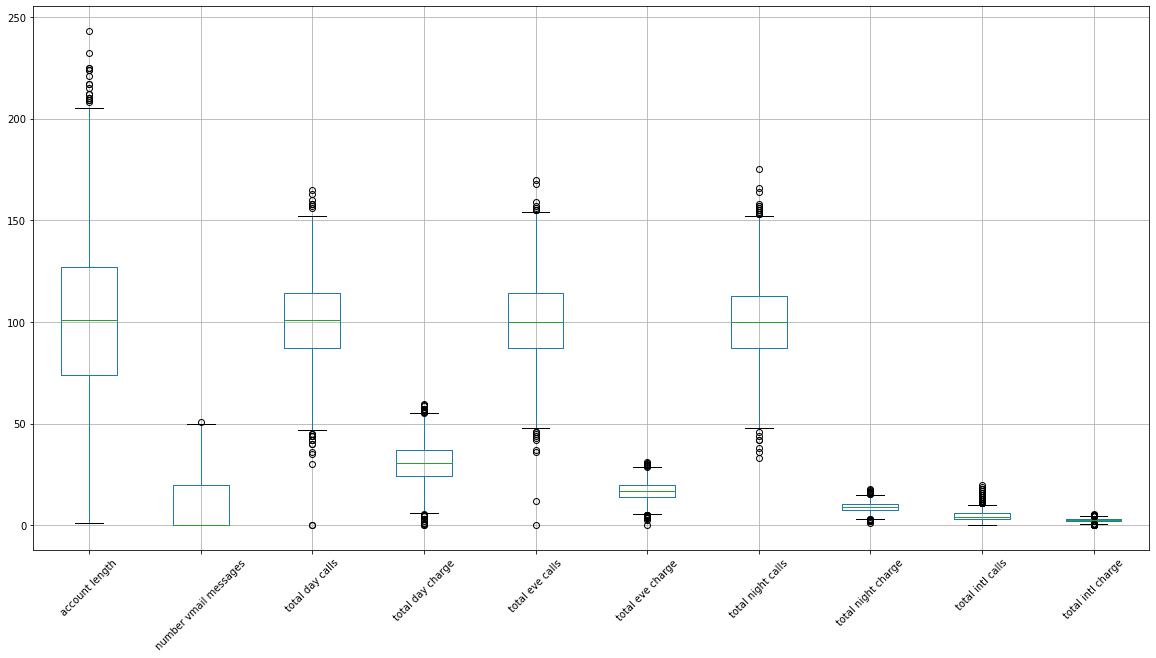

In [181]:
df.boxplot(column = [ 'account length','number vmail messages',
       'total day calls', 'total day charge', 'total eve calls',
       'total eve charge', 'total night calls', 'total night charge',
       'total intl calls', 'total intl charge'], rot=45, figsize = (20,10));

**Replacing Outliers With Median**


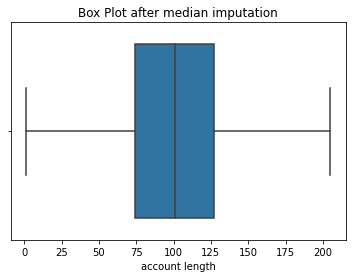

In [182]:
q1 = df['account length'].quantile(0.25)
q3 = df['account length'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.median(df['account length'])
for i in df['account length']:
    if i > Upper_tail or i < Lower_tail:
            df['account length'] = df['account length'].replace(i, m)
sns.boxplot(df['account length'])
plt.title("Box Plot after median imputation")
plt.show()

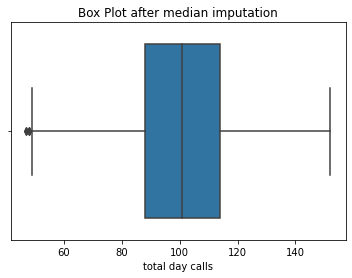

In [183]:
q1 = df['total day calls'].quantile(0.25)
q3 = df['total day calls'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr

m = np.median(df['total day calls'])
for i in df['total day calls']:
    if i > Upper_tail or i < Lower_tail:
            df['total day calls'] = df['total day calls'].replace(i, m)
sns.boxplot(df['total day calls'])
plt.title("Box Plot after median imputation")
plt.show()

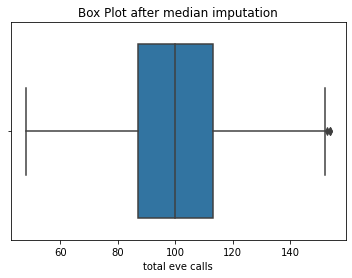

In [184]:
q1 = df['total eve calls'].quantile(0.25)
q3 = df['total eve calls'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.median(df['total eve calls'])
for i in df['total eve calls']:
    if i > Upper_tail or i < Lower_tail:
            df['total eve calls'] = df['total eve calls'].replace(i, m)
sns.boxplot(df['total eve calls'])
plt.title("Box Plot after median imputation")
plt.show()

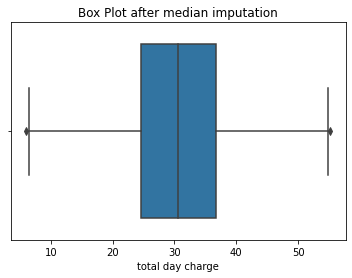

In [185]:
q1 = df['total day charge'].quantile(0.25)
q3 = df['total day charge'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.median(df['total day charge'])
for i in df['total day charge']:
    if i > Upper_tail or i < Lower_tail:
            df['total day charge'] = df['total day charge'].replace(i, m)
sns.boxplot(df['total day charge'])
plt.title("Box Plot after median imputation")
plt.show()

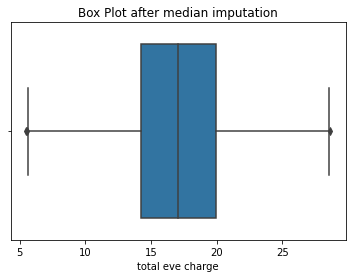

In [186]:
q1 = df['total eve charge'].quantile(0.25)
q3 = df['total eve charge'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.median(df['total eve charge'])
for i in df['total eve charge']:
    if i > Upper_tail or i < Lower_tail:
            df['total eve charge'] = df['total eve charge'].replace(i, m)
sns.boxplot(df['total eve charge'])
plt.title("Box Plot after median imputation")
plt.show()

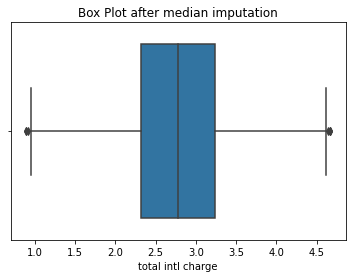

In [187]:
q1 = df['total intl charge'].quantile(0.25)
q3 = df['total intl charge'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.median(df['total intl charge'])
for i in df['total intl charge']:
    if i > Upper_tail or i < Lower_tail:
            df['total intl charge'] = df['total intl charge'].replace(i, m)
sns.boxplot(df['total intl charge'])
plt.title("Box Plot after median imputation")
plt.show()


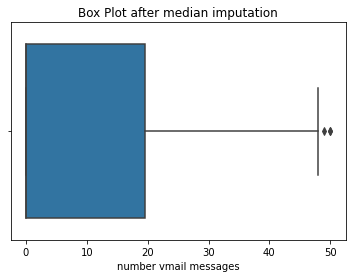

In [188]:
q1 = df['number vmail messages'].quantile(0.25)
q3 = df['number vmail messages'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.median(df['number vmail messages'])
for i in df['number vmail messages']:
    if i > Upper_tail or i < Lower_tail:
            df['number vmail messages'] = df['number vmail messages'].replace(i, m)
sns.boxplot(df['number vmail messages'])
plt.title("Box Plot after median imputation")
plt.show()

**Descriptive Statistics**

In [189]:
df.describe()

,account length,area code,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
count,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000
mean,100.473906,437.165913,8.085671,100.615385,30.593155,100.178582,17.095520,100.077225,9.041931,4.475415,2.778462,1.558673
std,38.895712,42.365335,13.672496,19.347072,8.959217,19.333433,4.171792,19.586370,2.277571,2.457775,0.695761,1.313472
min,1.000000,408.000000,0.000000,47.000000,5.970000,48.000000,5.470000,33.000000,1.040000,0.000000,0.890000,0.000000
25%,74.000000,408.000000,0.000000,88.000000,24.540000,87.000000,14.205000,87.000000,7.520000,3.000000,2.320000,1.000000
50%,101.000000,415.000000,0.000000,101.000000,30.500000,100.000000,17.090000,100.000000,9.050000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,19.500000,114.000000,36.720000,113.000000,19.970000,113.000000,10.590000,6.000000,3.240000,2.000000
max,205.000000,510.000000,50.000000,152.000000,55.200000,154.000000,28.650000,175.000000,17.770000,20.000000,4.670000,9.000000


**Explanatory Data Analysis(EDA)**

**Univarialte Analysis of Categorical Variables**

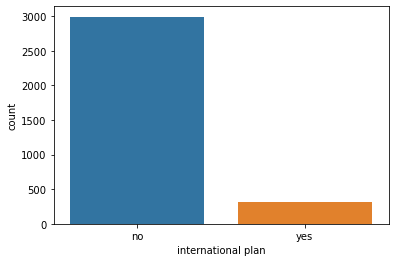

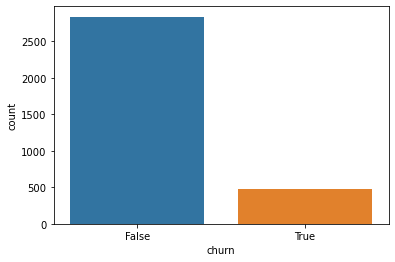

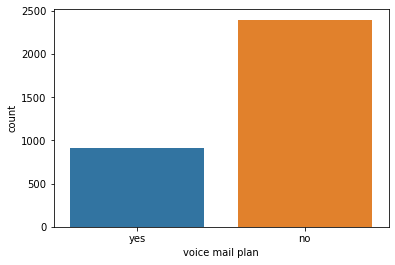

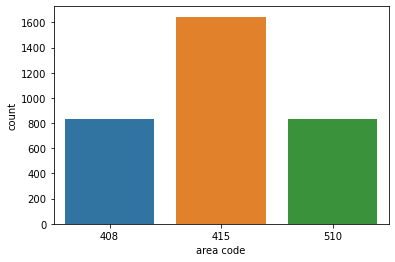

In [190]:
sns.countplot(df['international plan'])
plt.show()
sns.countplot(df['churn'])
plt.show()
sns.countplot(df['voice mail plan'])
plt.show()
sns.countplot(df['area code'])
plt.show()

In [191]:
df['area code'].value_counts()

415    1645
408     835
510     835
Name: area code, dtype: int64

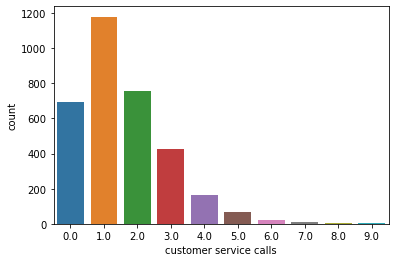

1.0    1179
2.0     755
0.0     694
3.0     424
4.0     163
5.0      65
6.0      22
7.0       9
9.0       2
8.0       2
Name: customer service calls, dtype: int64

In [192]:
df['area code'].value_counts()
sns.countplot(df['customer service calls'])
plt.show()
df['customer service calls'].value_counts()


**OBSERVATION**

*14% of customers have discontinued telecom services i.e.churn*

*49% of customers belong to Area Code 415*

*36% of customers gave only one customer service call*

*9% of customers use international plan*

*27% of customers use voice mail plan*

**Univariate Analysis of Quantitative Variables**

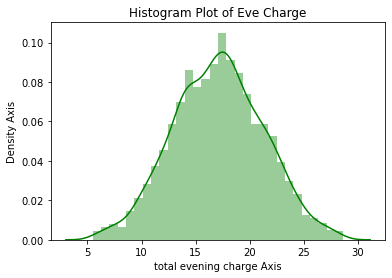

In [193]:
sns.distplot(df['total eve charge'],color="green") 
plt.xlabel("total evening charge Axis")
plt.ylabel("Density Axis")
plt.title("Histogram Plot of Eve Charge")
plt.show()


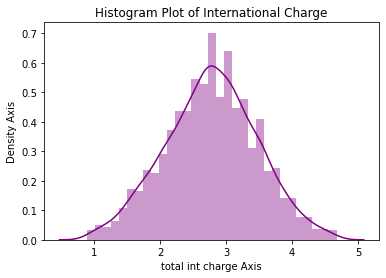

In [194]:
sns.distplot(df['total intl charge'],color="purple") 
plt.xlabel("total int charge Axis")
plt.ylabel("Density Axis")
plt.title("Histogram Plot of International Charge")
plt.show()

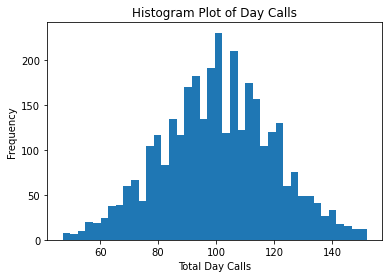

In [195]:
plt.hist(df['total day calls'], bins=40)
plt.xlabel("Total Day Calls")
plt.ylabel("Frequency")
plt.title("Histogram Plot of Day Calls")
plt.show()

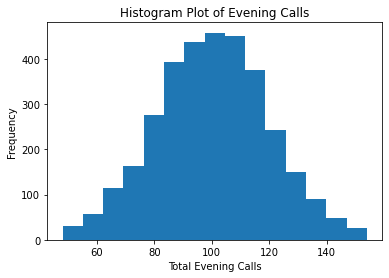

In [196]:
plt.hist(df['total eve calls'], bins=15)
plt.xlabel("Total Evening Calls")
plt.ylabel("Frequency")
plt.title("Histogram Plot of Evening Calls")
plt.show()

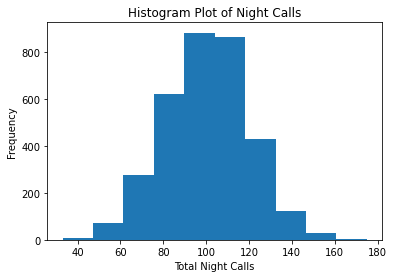

In [197]:
plt.hist(df['total night calls'], bins=10)
plt.xlabel("Total Night Calls")
plt.ylabel("Frequency")
plt.title("Histogram Plot of Night Calls")
plt.show()

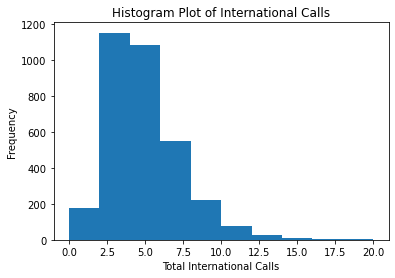

In [198]:
plt.hist(df['total intl calls'], bins=10)
plt.xlabel("Total International Calls")
plt.ylabel("Frequency")
plt.title("Histogram Plot of International Calls")
plt.show()

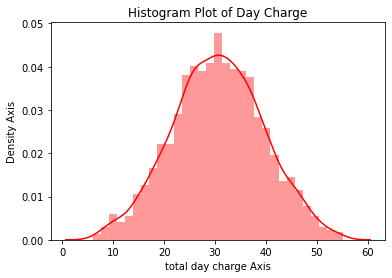

In [199]:
sns.distplot(df['total day charge'],color="red") 
plt.xlabel("total day charge Axis")
plt.ylabel("Density Axis")
plt.title("Histogram Plot of Day Charge")
plt.show()

**OBSERVATION**

*Total Evening Charge column - Uniformly Distributed - Total eve charge is centred around mean with minimum skewness*

*Total International Charge column - Moderately left skewed distributiuon*

*Total Day calls column - Uniformly Distributed*

*Total Evening Calls column - Uniformly Distributed*

*Total Night Calls column - Moderately right skewed distribution*

*Total International Calls column - Right skewed distribution*

*Total Day Charge Column - Uniformly Distributed*

**Bivariate Analysis**

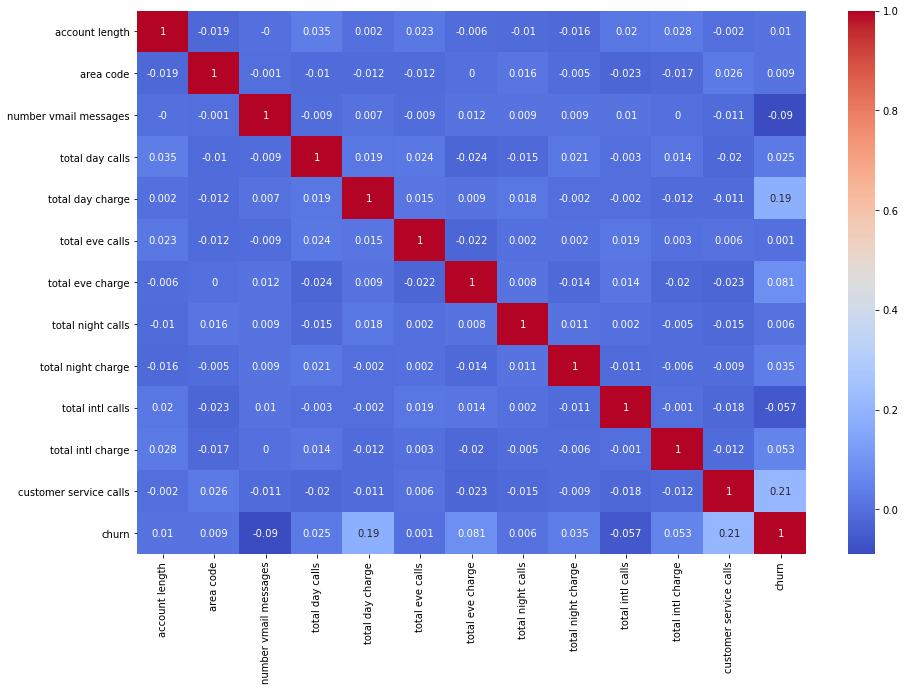

In [200]:
cor = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor.round(3),annot=True,cmap='coolwarm')
plt.show()

In [201]:
# Group data by 'Churn' and compute the mean
print(df.groupby('churn')['customer service calls'].mean())


churn
False    1.445384
True     2.232704
Name: customer service calls, dtype: float64


In [202]:
# Count the number of churners and non-churners by State
print(df.groupby('state')['churn'].value_counts())


state  churn
AK     False    49
       True      3
AL     False    72
       True      8
AR     False    44
                ..
WI     True      7
WV     False    96
       True     10
WY     False    68
       True      8
Name: churn, Length: 102, dtype: int64


**OBSERVATION**

Total Day Charge, Total Eve charge and Customer Service Calls influence Churn.

Account Length has moderate positive relationship with Churn.

Area Code has moderate positive relationship with Churn.

Number voice mail messages has moderate negative relationship with Churn.

Total Day calls has moderate positive relationship with Churn.

Total eve calls has moderate positive relationship with Churn.

Total night calls has moderate positive relationship with Churn.

Total Night charge has moderate positive relationship with Churn.

Total Intl calls has moderate negative relationship with Churn.

Total Intl Charge has moderate positive relationship with Churn.

<AxesSubplot:xlabel='customer service calls', ylabel='count'>

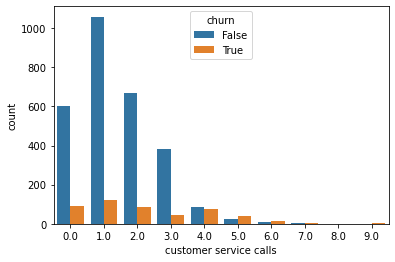

In [203]:
sns.countplot(x ='customer service calls', hue='churn', data=df)

**OBSERVATION**

*Proportion of churn rate is very high for more than three customer service calls.*

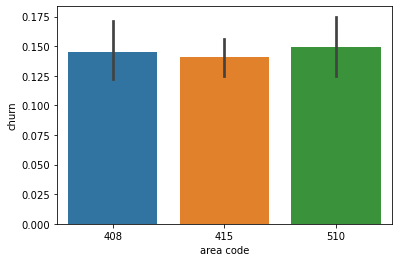

In [204]:
sns.barplot(df['area code'], df['churn'])
plt.show()

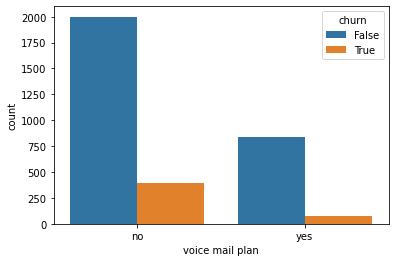

In [205]:
sns.countplot(x='voice mail plan', hue='churn', data=df, order = df['voice mail plan'].value_counts().index);

**OBSERVATION**

*15% of customer who don't have voice mail plan discontinued the telecom services i.e.churn*

*12.5% of customer who have voice mail plan discontinued the telecom services i.e.churn*

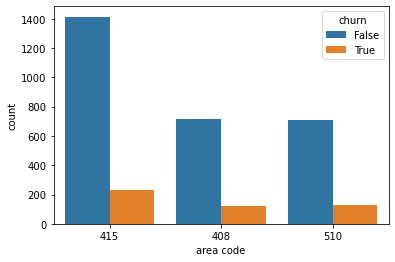

In [206]:
sns.countplot(x='area code', hue='churn', data=df, order = df['area code'].value_counts().index);

**OBSERVATION**

*Churn rate for area code 415,510 and 408 is 14.28%,14.28% and 15.71 respectively.*

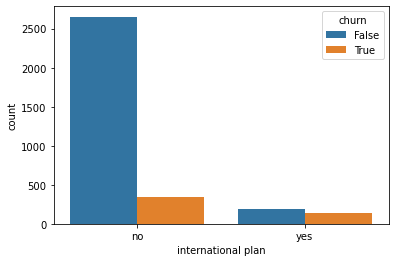

In [207]:
sns.countplot(x='international plan', hue='churn', data=df, order = df['international plan'].value_counts().index);

**OBSERVATION**

*10% of customer who don't have international plan discontinued the telecom services i.e.churn*

*90% of customer who have international plan discontinued the telecom services i.e.churn*

In [208]:
df.groupby('area code').aggregate({'total day charge':'sum','total eve charge':'sum',
                                            'total night charge':'sum'})

,total day charge,total eve charge,total night charge
area code,,,
408,25213.68,14285.43,7490.04
415,50846.12,28110.65,14953.71
510,25356.51,14275.57,7530.25


**OBSERVATION**

*Telcom company generates double revenue from area code 415 in comparison to 408 and 510 area code.*

*Possible reason for this could be more customers in area code 415*

In [209]:
df.groupby('area code').aggregate({'total intl charge':'sum'})

,total intl charge
area code,
408,2295.64
415,4613.96
510,2301.00


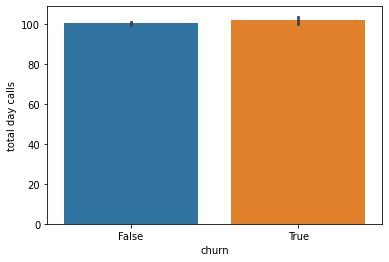

In [210]:
sns.barplot(df['churn'], df['total day calls'])
plt.show()

**OBSERVATION**

*Customer who churn and don't churn makes 110 and 100 calls respectively,which indicate that total number of calls doesn't affect churn rate.*

In [211]:
df.groupby('area code').aggregate({'total day charge':'sum','total eve charge':'sum',
                                            'total night charge':'sum'})

,total day charge,total eve charge,total night charge
area code,,,
408,25213.68,14285.43,7490.04
415,50846.12,28110.65,14953.71
510,25356.51,14275.57,7530.25


**Multivariate Analysis**

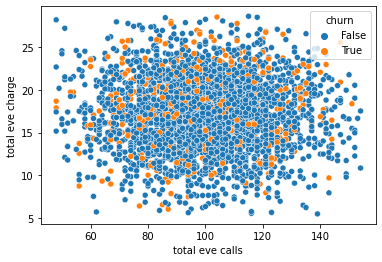

In [212]:
sns.scatterplot(df["total eve calls"], df["total eve charge"], hue=df["churn"])
plt.show()

**OBSERVATION**

*It's almost spread like a cloud. There seems to less churners among the evening callers.*

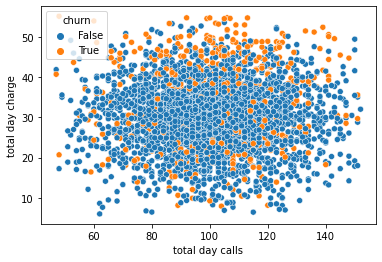

In [213]:
sns.scatterplot(df["total day calls"], df["total day charge"], hue=df["churn"])
plt.show()

**OBSERVATION**

*It's almost spread like a cloud.Churn rate increases at higher rate when the total day charge is more than 40.*

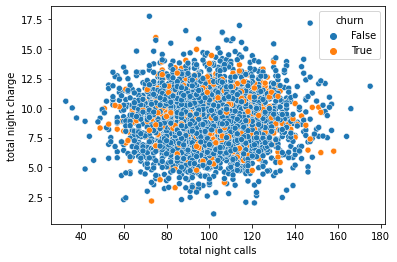

In [214]:
sns.scatterplot(df["total night calls"], df["total night charge"], hue=df["churn"])
plt.show()

**OBSERVATION**

*It's almost spread like a cloud. There seems to less churners among the night callers.*

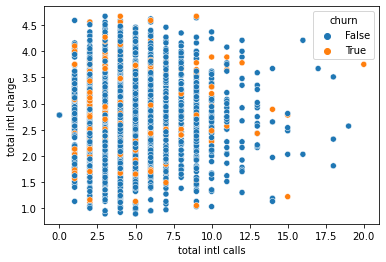

In [215]:
sns.scatterplot(df["total intl calls"], df["total intl charge"], hue=df["churn"])
plt.show()

**OBSERVATION**

*Customers who make 2 international calls are most likely to churn.*

*Customers who make 7 international calls are least likely to churn.*


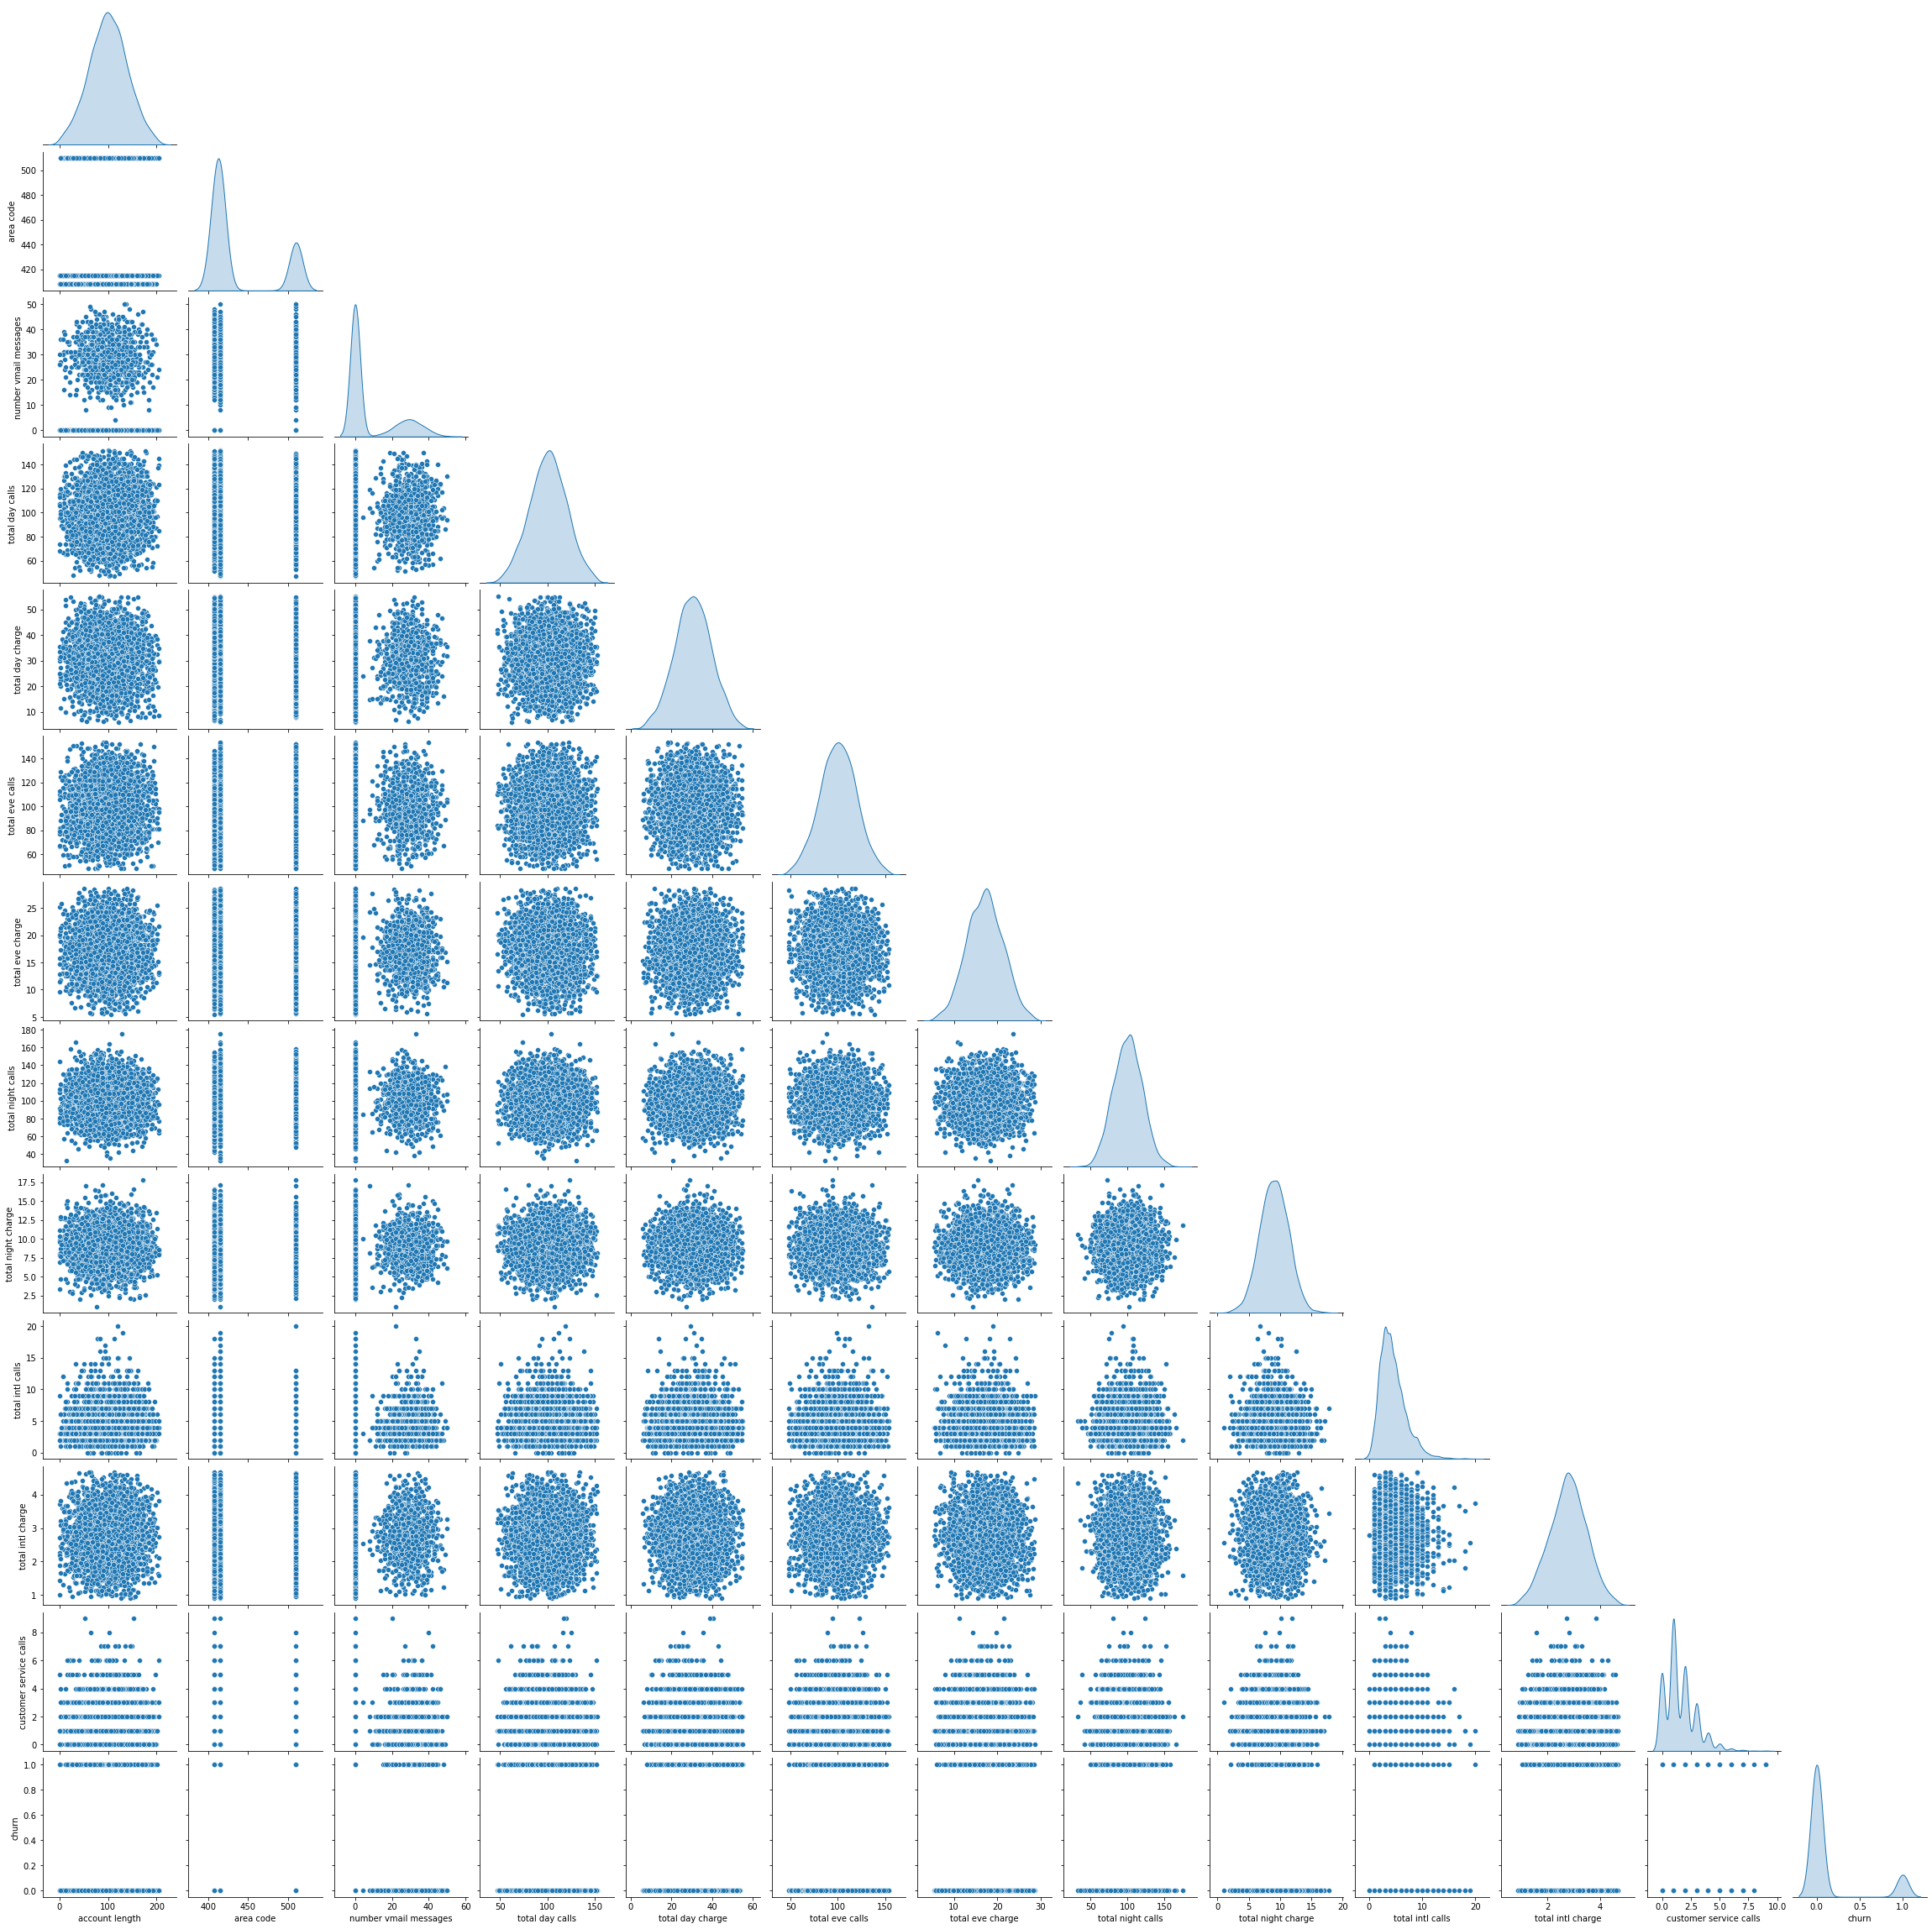

In [216]:
sns.pairplot(df, diag_kind = 'kde', corner = True);

**OBSERVATION**

Diagonal Analysis

If we look at the KDE Diagonal plots then most of the distributional are uniform with one Gausian Peak.The diagonal analysis give same insights as we got from univariate analysis.

Off Diagonal Analysis: Relationship between indpendent attributes.

Scatter Plot

As seen earlier in the bivariate analysis, in Multivariate analysis too most of the scatter plots create a cloud like structure, signifying no strong corelation among variables.

**THE MODEL**

For performance assessment of the chosen models, various metrics are used

FEATURE WEIGHTS - Indicates the top features used by the model to generate the predictions

CONFUSION MATRIX: Shows a grid of true and false predictions compared to the actual values

ACCURANCY SCORE: Shows the overall accuracy of the model for training set and test set

ROC CURVE: Shows the diagnostic ability of a model by bringing together true positive rate (TPR) and false positive rate (FPR) for different thresholds of class predictions (e.g. thresholds of 10%, 50% or 90% resulting to a prediction of churn)

AUC (for ROC): Measures the overall separability between classes of the model related to the ROC curve

PRECISION RECALL VALUE: Shows the diagnostic ability by comparing false positive rate (FPR) and false negative rate (FNR) for different thresholds of class predictions. It is suitable for data sets with high class imbalances (negative values overrepresented) as it focuses on precision and recall, which are not dependent on the number of true negatives and thereby excludes the imbalance

F1 SCORE: Builds the harmonic mean of precision and recall and thereby measures the compromise between both

AUC (for PRC): Measures the overall separability between classes of the model related to the Precision-Recall curve



ASSUMPTIONS ABOUT THE DATA FROM ABOVE EDA

The features are normally distributed

The features are on the same scale

The datatypes of features are numeric

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3315 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3315 non-null   object 
 1   account length          3315 non-null   float64
 2   area code               3315 non-null   int64  
 3   phone number            3315 non-null   object 
 4   international plan      3315 non-null   object 
 5   voice mail plan         3315 non-null   object 
 6   number vmail messages   3315 non-null   float64
 7   total day calls         3315 non-null   float64
 8   total day charge        3315 non-null   float64
 9   total eve calls         3315 non-null   float64
 10  total eve charge        3315 non-null   float64
 11  total night calls       3315 non-null   float64
 12  total night charge      3315 non-null   float64
 13  total intl calls        3315 non-null   float64
 14  total intl charge       3315 non-null   

In [218]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,KS,128.0,415,382-4657,no,yes,25.0,110.0,45.07,99.0,16.78,91.0,11.01,3.0,2.70,1.0,False
1,OH,107.0,415,371-7191,no,yes,26.0,123.0,27.47,103.0,16.62,103.0,11.45,3.0,3.70,1.0,False
2,NJ,137.0,415,358-1921,no,no,0.0,114.0,41.38,110.0,10.30,104.0,7.32,5.0,3.29,0.0,False
3,OH,84.0,408,375-9999,yes,no,0.0,71.0,50.90,88.0,17.09,89.0,8.86,7.0,1.78,2.0,False
4,OK,75.0,415,330-6626,yes,no,0.0,113.0,28.34,122.0,12.61,121.0,8.41,3.0,2.73,3.0,False


*Removing Unecessary columns that are not useful in our 
analysis we won't consider phone number and state.
Instead, this model will be used to interpret the
remaining contributors of churn*

In [219]:
df=df.drop(['state'],axis=1)
df.head()

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,128.0,415,382-4657,no,yes,25.0,110.0,45.07,99.0,16.78,91.0,11.01,3.0,2.70,1.0,False
1,107.0,415,371-7191,no,yes,26.0,123.0,27.47,103.0,16.62,103.0,11.45,3.0,3.70,1.0,False
2,137.0,415,358-1921,no,no,0.0,114.0,41.38,110.0,10.30,104.0,7.32,5.0,3.29,0.0,False
3,84.0,408,375-9999,yes,no,0.0,71.0,50.90,88.0,17.09,89.0,8.86,7.0,1.78,2.0,False
4,75.0,415,330-6626,yes,no,0.0,113.0,28.34,122.0,12.61,121.0,8.41,3.0,2.73,3.0,False


In [220]:
df=df.drop(['phone number'],axis=1)
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,128.0,415,no,yes,25.0,110.0,45.07,99.0,16.78,91.0,11.01,3.0,2.70,1.0,False
1,107.0,415,no,yes,26.0,123.0,27.47,103.0,16.62,103.0,11.45,3.0,3.70,1.0,False
2,137.0,415,no,no,0.0,114.0,41.38,110.0,10.30,104.0,7.32,5.0,3.29,0.0,False
3,84.0,408,yes,no,0.0,71.0,50.90,88.0,17.09,89.0,8.86,7.0,1.78,2.0,False
4,75.0,415,yes,no,0.0,113.0,28.34,122.0,12.61,121.0,8.41,3.0,2.73,3.0,False


*In telco churn data, Churn, Voice mail plan, and 
International plan in particular, are binary
features that can easily be converted into 0’s and 1’s.
Hence, we convert them into dummy variable*

In [221]:
df["international plan"] = df["international plan"].map({"yes":1, "no": 0})
df["voice mail plan"] = df["voice mail plan"].map({"yes":1, "no":0})
df['churn'] = df['churn'].map({True:1, False:0})

FEATURE SCALING AND SEPARATING OUR INDEPENDENT AND DEPENDENT VARIABLES

In [222]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('churn', axis='columns'))
Y = df['churn']

*Splitting the dataset into the Training and Test sets*



*Training data 80%, and testing data 20%. We randomize the data before splitting the value for random_state = 123 is just to repeat the same training and test*


In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=100)

LOGISTIC REGRESSION

In [224]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(class_weight='balanced')
model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [225]:
model.coef_

array([[ 6.00668043e-02,  7.69175578e-02,  6.87226281e-01,
        -7.32892016e-01,  3.90906301e-01,  3.43964583e-02,
         6.99208072e-01, -3.57209478e-05,  2.87601352e-01,
        -4.28968971e-02,  2.11041695e-01, -1.78900792e-01,
         1.34933887e-01,  7.57945060e-01]])

In [226]:
model.intercept_

array([-0.53143192])

In [227]:
ypred=model.predict(X_test)
print(ypred)

[1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1
 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1
 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1
 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1
 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0
 0 0 0 0 1 0 1 0 0 0 1 0 

In [228]:
ypred[0:200]

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1], dtype=int64)

In [229]:
df.churn.value_counts()

0    2838
1     477
Name: churn, dtype: int64

Text(0.5, 15.0, 'Predicted')

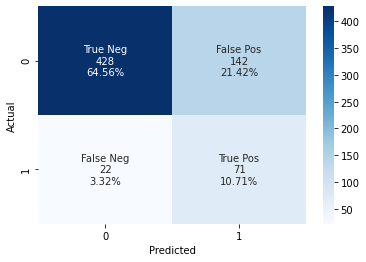

In [230]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, ypred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.ylabel("Actual")
plt.xlabel("Predicted")

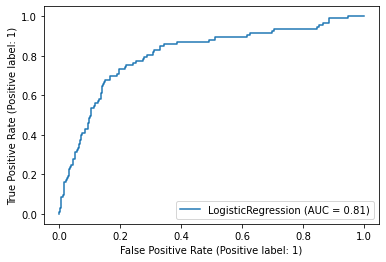

In [231]:
from sklearn import metrics
metrics.plot_roc_curve(model, X_test, y_test)  
plt.show()

MODEL SUMMARY

In [232]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.648268
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3315
Model:                          Logit   Df Residuals:                     3301
Method:                           MLE   Df Model:                           13
Date:                Mon, 26 Jul 2021   Pseudo R-squ.:                 -0.5736
Time:                        16:37:11   Log-Likelihood:                -2149.0
converged:                       True   LL-Null:                       -1365.7
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0088      0.036      0.242      0.809      -0.062       0.080
x2            -0.0118      0.

Performance Analysis Test Data

In [233]:
from sklearn import metrics
ypred = model.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test,ypred))
print("Recall : ",metrics.recall_score(y_test,ypred))
print("F1 score : ",metrics.f1_score(y_test,ypred))
print("Precision : ",metrics.precision_score(y_test,ypred))

Accuracy :  0.7526395173453997
Recall :  0.7634408602150538
F1 score :  0.4640522875816993
Precision :  0.3333333333333333


Performance Analysis Train Data

In [234]:
ypred2 = model.predict(X_train)
print("Accuracy : ",metrics.accuracy_score(y_train,ypred2))
print("Recall : ",metrics.recall_score(y_train,ypred2))
print("F1 score : ",metrics.f1_score(y_train,ypred2))
print("Precision : ",metrics.precision_score(y_train,ypred2))

Accuracy :  0.7631975867269984
Recall :  0.75
F1 score :  0.478405315614618
Precision :  0.35121951219512193


RANDOM FOREST CLASSIFIER

In [235]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [236]:
# Predict the labels for the test set
y_pred = clf.predict(X_test)

Evaluating Model Performance

In [237]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracy_score(y_test, y_pred)
accuracy=round(accuracy_score(y_pred, y_test)*100,2)
print("Accuracy of this model is ", accuracy, "%")

Accuracy of this model is  93.97 %


*Confusion Matrix*

In [238]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[567   3]
 [ 37  56]]


Text(0.5, 15.0, 'Predicted')

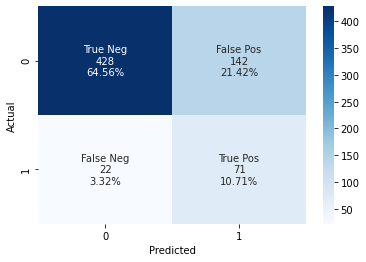

In [239]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, ypred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.ylabel("Actual")
plt.xlabel("Predicted")

*From the confusion matrix, we can compute the following metrics*
True Positives(TP) = 62

True Negatives(TN) = 567

False Positives(FP) = 3

False Negatives(FN) = 31

Precision = TP/(TP+FP) = 0.95

Recall = TP/(TP+FN) = 0.64

Accuracy = (TP+TN)/(TP+TN+FP+FN) = 0.9487

In [240]:
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       570
           1       0.95      0.60      0.74        93

    accuracy                           0.94       663
   macro avg       0.94      0.80      0.85       663
weighted avg       0.94      0.94      0.93       663



In [241]:
clf.feature_importances_

array([0.05435215, 0.01509984, 0.0683732 , 0.02001233, 0.02641779,
       0.05263304, 0.23767835, 0.05229504, 0.09925809, 0.05314436,
       0.06623278, 0.0585954 , 0.06887294, 0.12703468])

*Performance Analysis Test Data*

In [242]:
from sklearn import metrics
ypred = clf.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test,ypred))
print("Recall : ",metrics.recall_score(y_test,ypred))
print("F1 score : ",metrics.f1_score(y_test,ypred))
print("Precision : ",metrics.precision_score(y_test,ypred))

Accuracy :  0.9396681749622926
Recall :  0.6021505376344086
F1 score :  0.7368421052631579
Precision :  0.9491525423728814


*Performance Analysis Train Data*

In [243]:
ypred2 = clf.predict(X_train)
print("Accuracy : ",metrics.accuracy_score(y_train,ypred2))
print("Recall : ",metrics.recall_score(y_train,ypred2))
print("F1 score : ",metrics.f1_score(y_train,ypred2))
print("Precision : ",metrics.precision_score(y_train,ypred2))

Accuracy :  1.0
Recall :  1.0
F1 score :  1.0
Precision :  1.0


KNN CLASSSIFIER

In [244]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [245]:
knn = KNeighborsClassifier(n_neighbors=7)

In [246]:
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=7)

In [247]:
# Predict on dataset which model has not seen before
print(knn.predict(X_test))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 

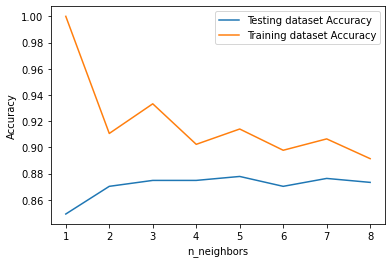

In [248]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

*Performance Analysis Test Data*

In [249]:
from sklearn import metrics
ypred = knn.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test,ypred))
print("Recall : ",metrics.recall_score(y_test,ypred))
print("F1 score : ",metrics.f1_score(y_test,ypred))
print("Precision : ",metrics.precision_score(y_test,ypred))

Accuracy :  0.8733031674208145
Recall :  0.15053763440860216
F1 score :  0.25
Precision :  0.7368421052631579


*Performance Analysis Train Data*

In [250]:
ypred2 = knn.predict(X_train)
print("Accuracy : ",metrics.accuracy_score(y_train,ypred2))
print("Recall : ",metrics.recall_score(y_train,ypred2))
print("F1 score : ",metrics.f1_score(y_train,ypred2))
print("Precision : ",metrics.precision_score(y_train,ypred2))

Accuracy :  0.8914027149321267
Recall :  0.2708333333333333
F1 score :  0.41935483870967744
Precision :  0.9285714285714286


**DECISION TREE**

**Defining Dependent and Independent Variables**

In [251]:
X=df.drop(['churn'],axis = 1)
Y=df["churn"]
print(X.shape)
print(Y.shape)

(3315, 14)
(3315,)


**Defining Dummies for Categorical Variables**

In [252]:
X = pd.get_dummies(X)
X.dtypes

account length            float64
area code                   int64
international plan          int64
voice mail plan             int64
number vmail messages     float64
total day calls           float64
total day charge          float64
total eve calls           float64
total eve charge          float64
total night calls         float64
total night charge        float64
total intl calls          float64
total intl charge         float64
customer service calls    float64
dtype: object

**Checking Length of Column**

In [253]:
len(X.columns)

14

**Defining the Train and Test Dataset**

In [254]:
from sklearn import model_selection
validation_size=0.40
seed = 100
X_train,X_test,Y_train, Y_test=model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)

In [255]:
X_test.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
943,132.0,510,0,0,0.0,107.0,32.62,127.0,17.59,88.0,12.24,2.0,3.40,1.0
2008,86.0,415,0,1,33.0,112.0,43.03,94.0,17.86,98.0,4.27,4.0,3.21,3.0
2467,3.0,510,1,0,0.0,96.0,27.37,82.0,20.82,103.0,8.14,6.0,2.08,1.0
2849,156.0,510,0,0,0.0,122.0,40.41,91.0,15.43,151.0,8.36,4.0,2.08,1.0
3241,177.0,415,1,0,0.0,118.0,42.28,73.0,14.65,87.0,8.64,2.0,3.05,1.0


In [256]:
# Create tree object 
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(criterion="gini").fit(X_train,Y_train)

**Calculating Gini Values**

In [257]:
model_importance = pd.DataFrame(columns=['variable name', 'gini value'])
model_importance['variable name'] = X_train.columns
model_importance['gini value'] = model.feature_importances_
model_importance.sort_values(["gini value"], axis=0,ascending=False) 

,variable name,gini value
6,total day charge,0.244516
8,total eve charge,0.152337
13,customer service calls,0.129178
12,total intl charge,0.085679
2,international plan,0.081055
11,total intl calls,0.073321
10,total night charge,0.062721
3,voice mail plan,0.039873
5,total day calls,0.038696
0,account length,0.030186


In [258]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [259]:
# fit the model
clf_gini.fit(X_train, Y_train)
y_pred_gini = clf_gini.predict(X_test)
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9005


**Compare the train-set and test-set accuracy**

In [260]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [261]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, y_pred_train_gini)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9035
Training-set accuracy score: 0.9035


**OBSERVATION**

*Here, the training-set accuracy score is 0.9057 while the test-set accuracy to be 0.9005. These two values are quite comparable. So, there is no sign of overfitting.*

**Visualize decision-trees**

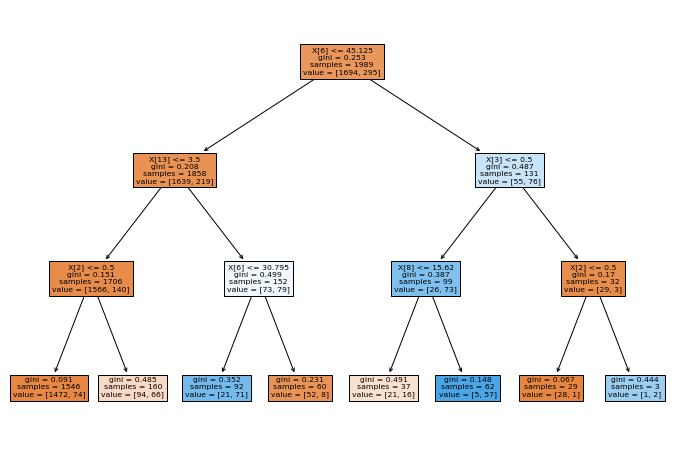

In [262]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, Y_train),filled = True)
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [263]:
# fit the model
clf_en.fit(X_train, Y_train)
y_pred_en = clf_en.predict(X_test)
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8771


**Compare the train-set and test-set accuracy, comparing the train-set and test-set accuracy to check for overfitting.**

In [264]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, y_pred_train_en)))


Training-set accuracy score: 0.8798


**Check for overfitting and underfitting**

In [265]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, Y_test)))

Training set score: 0.8798
Test set score: 0.8771


**Visualize decision-trees**

[Text(334.8, 380.52, 'X[13] <= 3.5\nentropy = 0.606\nsamples = 1989\nvalue = [1694, 295]'),
 Text(167.4, 271.8, 'X[6] <= 37.715\nentropy = 0.512\nsamples = 1825\nvalue = [1617, 208]'),
 Text(83.7, 163.07999999999998, 'X[2] <= 0.5\nentropy = 0.309\nsamples = 1423\nvalue = [1344, 79]'),
 Text(41.85, 54.360000000000014, 'entropy = 0.175\nsamples = 1296\nvalue = [1262, 34]'),
 Text(125.55000000000001, 54.360000000000014, 'entropy = 0.938\nsamples = 127\nvalue = [82, 45]'),
 Text(251.10000000000002, 163.07999999999998, 'X[3] <= 0.5\nentropy = 0.905\nsamples = 402\nvalue = [273, 129]'),
 Text(209.25, 54.360000000000014, 'entropy = 0.978\nsamples = 295\nvalue = [173, 122]'),
 Text(292.95, 54.360000000000014, 'entropy = 0.349\nsamples = 107\nvalue = [100, 7]'),
 Text(502.20000000000005, 271.8, 'X[6] <= 27.685\nentropy = 0.997\nsamples = 164\nvalue = [77, 87]'),
 Text(418.5, 163.07999999999998, 'X[8] <= 19.83\nentropy = 0.597\nsamples = 69\nvalue = [10, 59]'),
 Text(376.65000000000003, 54.36000

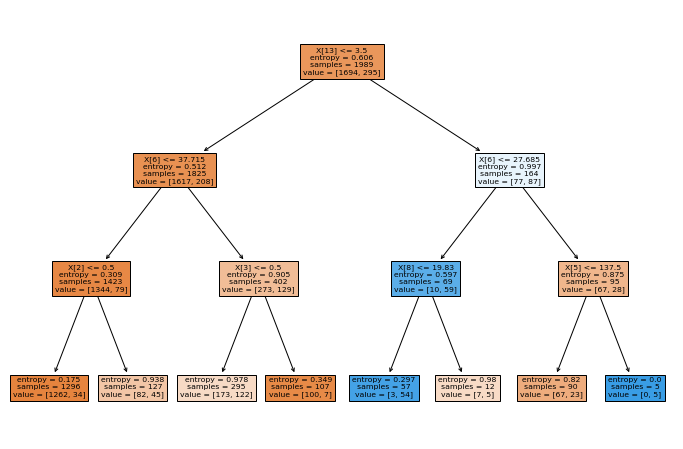

In [266]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, Y_train),filled = True)

In [267]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1141    3]
 [ 160   22]]


**Classification Report**

In [268]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1144
           1       0.88      0.12      0.21       182

    accuracy                           0.88      1326
   macro avg       0.88      0.56      0.57      1326
weighted avg       0.88      0.88      0.83      1326

